In [ ]:
#Source for this dataset is: https://github.com/datasets/football-datasets/tree/main/datasets/premier-league

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd 
import numpy as np 

df= pd.read_csv("season-2425.csv")
df.head(3)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,...,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,...,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,...,6,3,17,14,8,2,2,2,0,0


In [4]:
df = df. rename(columns={'FTHG': 'Full-Time Home Goals',
                         'FTAG':'Full-Time Away Goals',
                         'FTR':'Full-Time Result',
                         'HTHG':'Half-Time Home Goals',
                         'HTAG': 'Half-Time Away Goals',
                         'HTR': 'Half-Time Result',
                         'HS': 'Home Shots',
                         'AS': 'Away Shots',
                         'HST': 'Home Shots on Target',
                         'AST': 'Away Shots on Target',
                         'HF': 'Home Fouls',
                         'AF': 'Away Fouls',
                         'HC': 'Home Corners',
                         'AC': 'Away Corners',
                         'HY': 'Home Yellow Cards',
                         'AY': 'Away Yellow Cards',
                         'HR': 'Home Red Cards',
                         'AR': 'Away Red Cards'
                         })

In [5]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'Full-Time Home Goals',
       'Full-Time Away Goals', 'Full-Time Result', 'Half-Time Home Goals',
       'Half-Time Away Goals', 'Half-Time Result', 'Referee', 'Home Shots',
       'Away Shots', 'Home Shots on Target', 'Away Shots on Target',
       'Home Fouls', 'Away Fouls', 'Home Corners', 'Away Corners',
       'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards',
       'Away Red Cards'],
      dtype='object')

In [6]:
df.isnull().sum().head()

Date                    0
HomeTeam                0
AwayTeam                0
Full-Time Home Goals    0
Full-Time Away Goals    0
dtype: int64

In [7]:
df.shape

(281, 22)

In [8]:
df.describe()

,Full-Time Home Goals,Full-Time Away Goals,Half-Time Home Goals,Half-Time Away Goals,Home Shots,Away Shots,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,1.519573,1.466192,0.750890,0.644128,13.957295,12.195730,4.982206,4.316726,10.921708,11.359431,5.544484,4.950178,1.985765,2.177936,0.067616,0.064057
std,1.284721,1.233359,0.883504,0.870986,5.573370,5.242762,2.492067,2.397030,3.699555,3.667764,3.186856,2.978076,1.431711,1.385000,0.251533,0.245291
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,10.000000,9.000000,3.000000,3.000000,8.000000,9.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,13.000000,12.000000,5.000000,4.000000,11.000000,11.000000,5.000000,5.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,15.000000,6.000000,6.000000,13.000000,14.000000,8.000000,7.000000,3.000000,3.000000,0.000000,0.000000
max,7.000000,6.000000,4.000000,5.000000,36.000000,37.000000,16.000000,13.000000,21.000000,21.000000,17.000000,18.000000,7.000000,8.000000,1.000000,1.000000


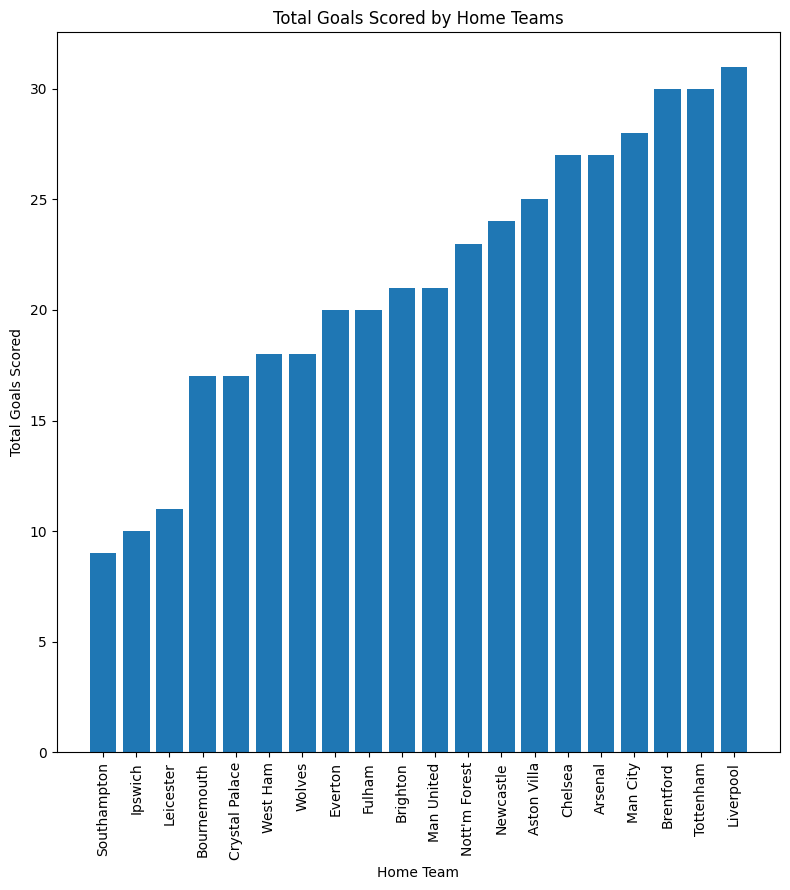

In [11]:
import matplotlib.pyplot as plt
home_Team_goals = df.groupby('HomeTeam')['Full-Time Home Goals'].sum().reset_index()
home_Team_goals = home_Team_goals.sort_values('Full-Time Home Goals')

plt.figure(figsize=(8, 9))  
plt.bar(range(len(home_Team_goals)), home_Team_goals['Full-Time Home Goals']) 
plt.xticks(range(len(home_Team_goals)), home_Team_goals['HomeTeam'], rotation=90)  
plt.xlabel('Home Team')
plt.ylabel('Total Goals Scored')
plt.title('Total Goals Scored by Home Teams')
plt.tight_layout() 
plt.show()

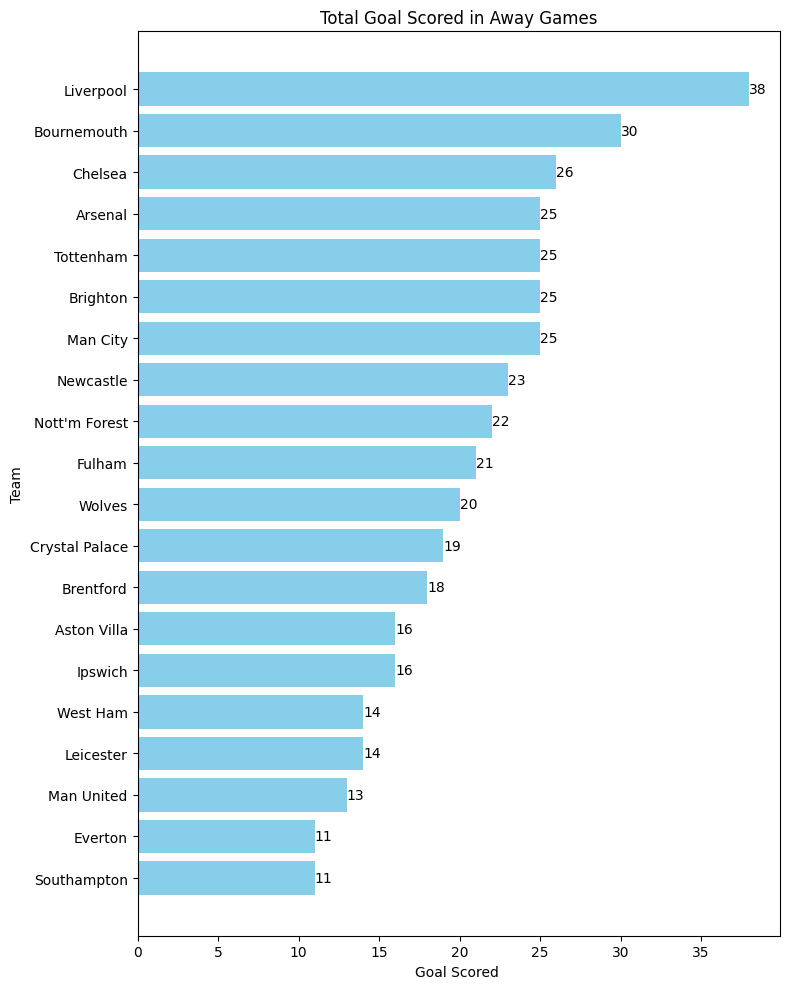

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

away_team = df.groupby('AwayTeam')['Full-Time Away Goals'].sum().reset_index()


away_team = away_team.sort_values('Full-Time Away Goals')

plt.figure(figsize=(8, 10))  
plt.barh(away_team['AwayTeam'], away_team['Full-Time Away Goals'], color='skyblue')  
plt.xlabel('Goal Scored ')  
plt.ylabel('Team')  
plt.title('Total Goal Scored in Away Games')  


for index, value in enumerate(away_team['Full-Time Away Goals']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()  
plt.show()

In [ ]:
df[(df["HomeTeam"] == "Liverpool")| (df["AwayTeam"] == "Liverpool")].head()


,Date,HomeTeam,AwayTeam,Full Time Home Team Goals,Full-Time Away Goals,Full-Time Result,Half-Time Home Goals,Half-Time Away Goals,Half-Time Result,Referee,...,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,...,2,5,9,18,2,10,3,1,0,0
19,25/08/24,Liverpool,Brentford,2,0,H,1,0,H,S Attwell,...,8,2,10,7,9,4,2,3,0,0
29,01/09/24,Man United,Liverpool,0,3,A,0,2,A,A Taylor,...,3,3,7,7,5,2,4,1,0,0
34,14/09/24,Liverpool,Nott'm Forest,0,1,A,0,0,D,M Oliver,...,5,3,15,6,7,2,4,4,0,0
44,21/09/24,Liverpool,Bournemouth,3,0,H,3,0,H,T Harrington,...,13,6,10,12,3,9,1,4,0,0


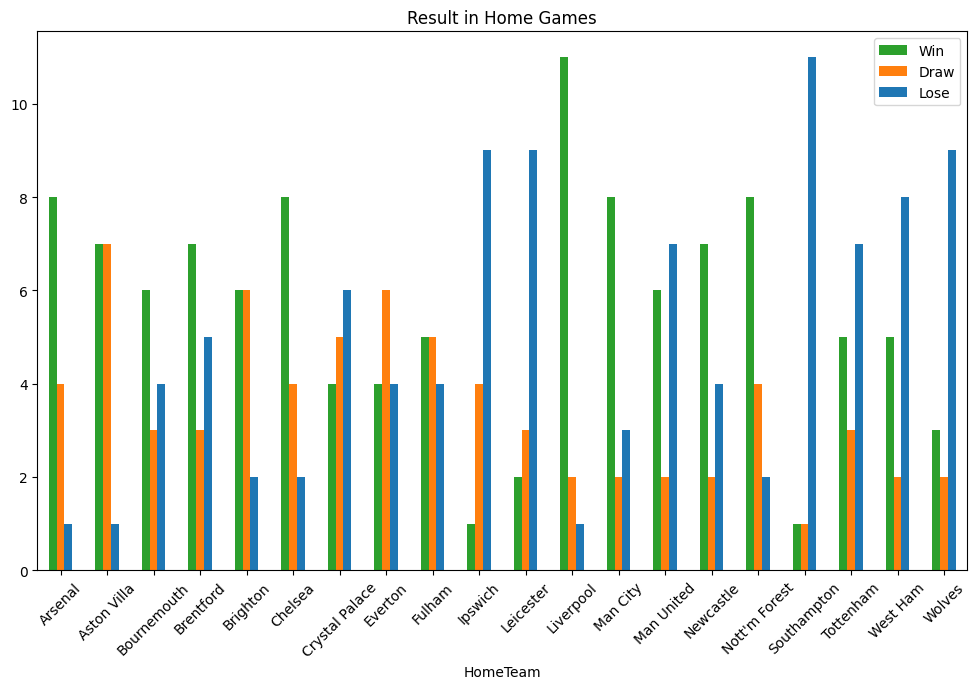

In [12]:

home_results = df.groupby('HomeTeam')['Full-Time Result'].value_counts().unstack().fillna(0)
home_results = home_results[['H', 'D', 'A']]
colors = {'A': '#1f77b4', 'D': '#FF7F0E', 'H': '#2CA02C'}
ax = home_results.plot(kind='bar', figsize=(12, 7), color=[colors[col] for col in home_results.columns])
ax.set_title("Result in Home Games")
ax.legend(['Win', 'Draw', 'Lose'])
plt.xticks(rotation=45, fontsize=10)
plt.show()

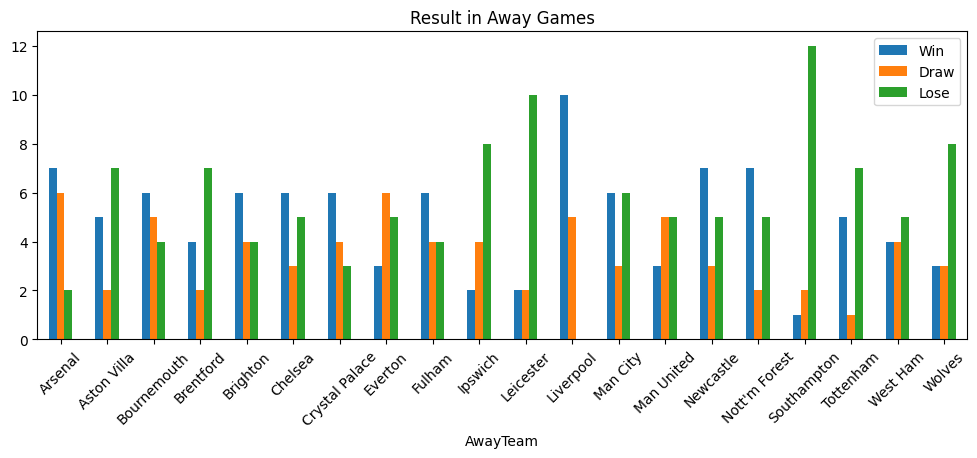

In [ ]:
away_results = df.groupby('AwayTeam')['Full-Time Result'].value_counts().unstack().fillna(0)
away_results = away_results[['A', 'D', 'H']]
colors = {'A': '#1f77b4', 'D': '#FF7F0E', 'H': '#2CA02C'}
ax = away_results.plot(kind='bar', figsize=(12, 4), color=[colors[col] for col in away_results.columns])
ax.set_title("Result in Away Games")
ax.legend(['Win', 'Draw', 'Lose'])
plt.xticks(rotation=45, fontsize=10)
plt.show()

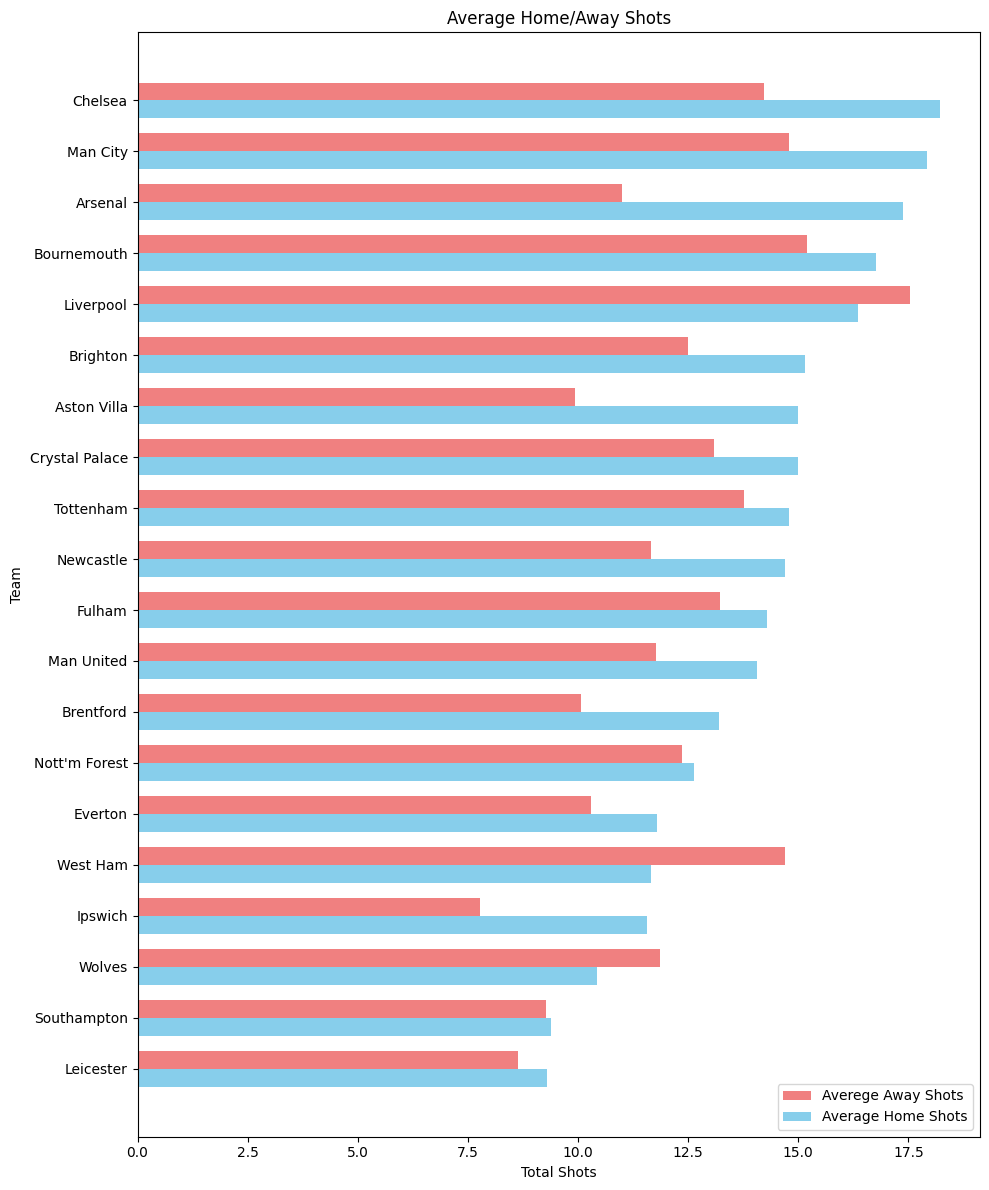

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


avg_home_shots = df.groupby('HomeTeam')['Home Shots'].mean().reset_index()
avg_away_shots = df.groupby('AwayTeam')['Away Shots'].mean().reset_index()

shots = pd.merge(avg_home_shots, avg_away_shots, left_on='HomeTeam', right_on='AwayTeam', how='inner')
shots = shots.rename(columns={'Home Shots': 'Average Home Shots', 'Away Shots': 'Average Away Shots'})  
shots = shots.sort_values('Average Home Shots')

plt.figure(figsize=(10, 12))  
teams = shots['HomeTeam']  
y = np.arange(len(teams)) 
bar_width = 0.35  
plt.barh(y + bar_width/2, shots['Average Away Shots'], height=bar_width, label='Averege Away Shots', color='lightcoral')
plt.barh(y - bar_width/2, shots['Average Home Shots'], height=bar_width, label='Average Home Shots', color='skyblue')

plt.yticks(y, teams)  
plt.xlabel('Total Shots')  
plt.ylabel('Team')  
plt.title('Average Home/Away Shots')  
plt.legend(loc='lower right')  

plt.tight_layout() 
plt.show()

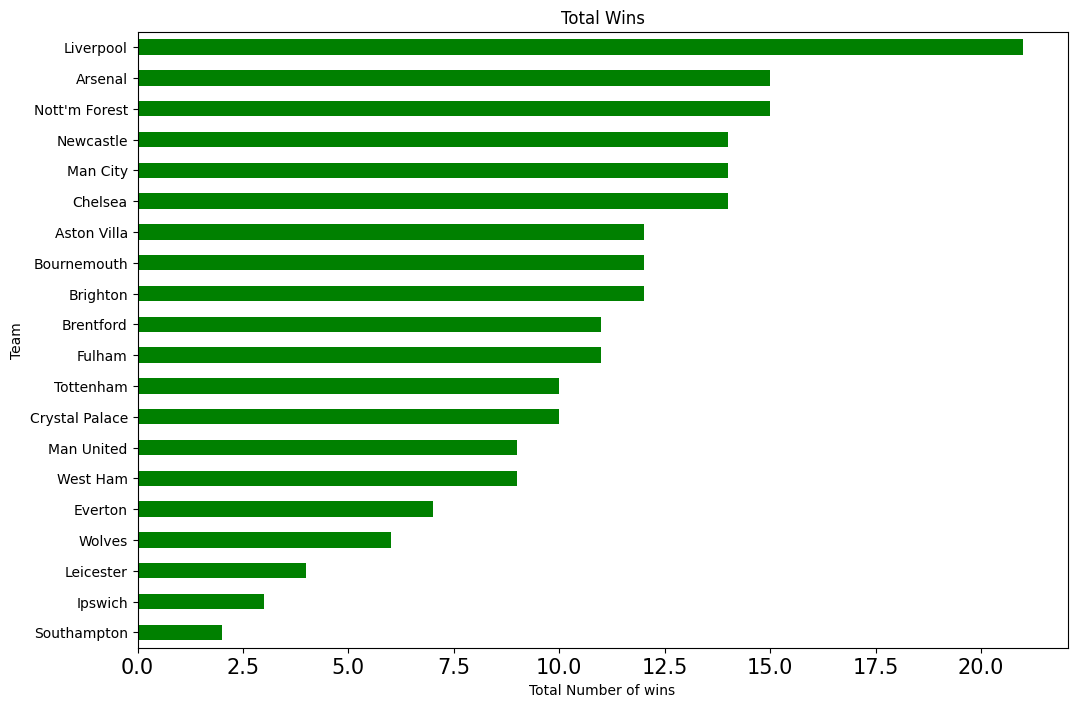

In [ ]:
team_wins = df[df['Full-Time Result'] == 'H']['HomeTeam'].value_counts().add(df[df['Full-Time Result'] == 'A']['AwayTeam'].value_counts())
plt.figure(figsize=(12, 8))
team_wins.sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Total Wins')
plt.xlabel('Total Number of wins')
plt.ylabel('Team')
plt.xticks(fontsize=15)
plt.show()

In [25]:
liverpool_matches = df[(df['HomeTeam'] == 'Liverpool') | (df['AwayTeam'] == 'Liverpool')]

In [45]:
total_matches = len(df[(df["HomeTeam"] == "Liverpool") | (df["AwayTeam"] == "Liverpool")])
print(f"Total Matches Played so far this season: {total_matches}")

Total Matches Played so far this season: 29


In [43]:
wins = len(liverpool_matches[(liverpool_matches['Full-Time Result'] == 'H') & (liverpool_matches['HomeTeam'] == 'Liverpool') | 
                             (liverpool_matches['Full-Time Result'] == 'A') & (liverpool_matches['AwayTeam'] == 'Liverpool')])
draws = len(liverpool_matches[liverpool_matches['Full-Time Result'] == 'D'])
losses = total_matches - wins - draws
print(f"Liverpool  Wins: {wins}, Draws: {draws}, Losses: {losses}")

Liverpool  Wins: 21, Draws: 7, Losses: 1


In [36]:
goals_scored = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Full-Time Home Goals'].sum() + \
               liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Full-Time Away Goals'].sum()
goals_conceded = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Full-Time Away Goals'].sum() + \
                 liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Full-Time Home Goals'].sum()
print(f"Goals Scored: {goals_scored}, Goals Conceded: {goals_conceded}")

Goals Scored: 69, Goals Conceded: 27


In [39]:
shots = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Home Shots'].sum() + \
        liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Away Shots'].sum()
shots_on_target = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Home Shots on Target'].sum() + \
                  liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Away Shots on Target'].sum()
print(f"Liverpool Shots :{shots} , liverpool Shots on Target:{shots_on_target}")

Liverpool Shots :492 , liverpool Shots on Target:183


In [40]:
fouls = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Home Fouls'].sum() + \
        liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Away Fouls'].sum()
print(f'Liverpool Fouls: {fouls}')

Liverpool Fouls: 337


In [41]:
corners = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Home Corners'].sum() + \
          liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Away Corners'].sum()
print(f" Liverpool Corners: {corners}")

 Liverpool Corners: 184


In [42]:
yellow_cards = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Home Yellow Cards'].sum() + \
               liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Away Yellow Cards'].sum()
red_cards = liverpool_matches[liverpool_matches['HomeTeam'] == 'Liverpool']['Home Red Cards'].sum() + \
            liverpool_matches[liverpool_matches['AwayTeam'] == 'Liverpool']['Away Red Cards'].sum()
print(f"Liverpool Yellowcard:{yellow_cards} , Liverpool Team Redcard:{red_cards}")

Liverpool Yellowcard:54 , Liverpool Team Redcard:2


In [46]:
win_rate = (wins / total_matches) * 100
print(f"Liverpool Team Win Rate:{win_rate} ")

Liverpool Team Win Rate:72.41379310344827 


In [48]:
avg_goals_scored = goals_scored / total_matches
avg_goals_conceded = goals_conceded / total_matches
print(f"Average Goal Scored: {avg_goals_scored}")
print(f"Average Goal Conceded:{avg_goals_conceded}")

Average Goal Scored: 2.3793103448275863
Average Goal Conceded:0.9310344827586207


In [50]:
avg_shots = shots / total_matches
print(f"Average Shot Per Matches:{avg_shots}")

Average Shot Per Matches:16.96551724137931


In [51]:
avg_shots_on_target = shots_on_target / total_matches
print(f"Average Shot on Target Per Matches: {avg_shots_on_target}")

Average Shot on Target Per Matches: 6.310344827586207


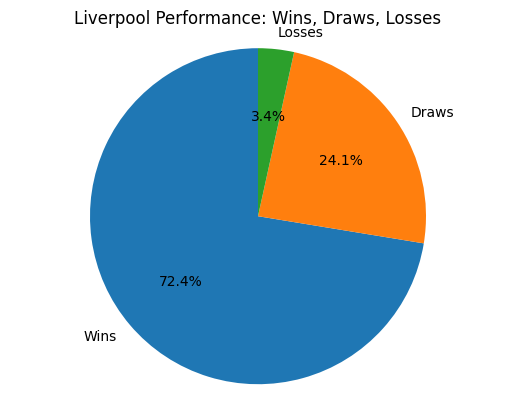

In [52]:
labels = ['Wins', 'Draws', 'Losses']
sizes = [wins, draws, losses]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Liverpool Performance: Wins, Draws, Losses')
plt.show()

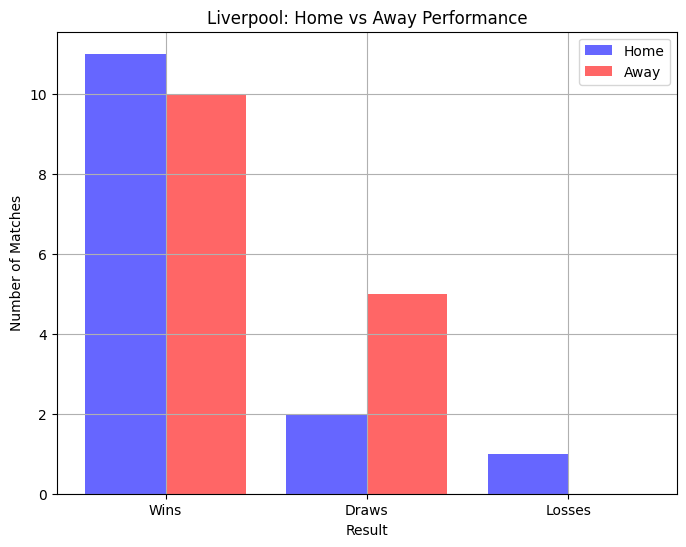

In [55]:

home_matches = liverpool_matches[liverpool_matches["HomeTeam"] == "Liverpool"]
away_matches = liverpool_matches[liverpool_matches["AwayTeam"] == "Liverpool"]

home_wins = len(home_matches[home_matches["Full-Time Result"] == "H"])
home_draws = len(home_matches[home_matches["Full-Time Result"] == "D"])
home_losses = len(home_matches) - home_wins - home_draws

away_wins = len(away_matches[away_matches["Full-Time Result"] == "A"])
away_draws = len(away_matches[away_matches["Full-Time Result"] == "D"])
away_losses = len(away_matches) - away_wins - away_draws

labels = ["Wins", "Draws", "Losses"]
home_data = [home_wins, home_draws, home_losses]
away_data = [away_wins, away_draws, away_losses]
x = range(len(labels))
plt.figure(figsize=(8, 6))
plt.bar(x, home_data, width=0.4, label="Home", color="blue", alpha=0.6)
plt.bar([i + 0.4 for i in x], away_data, width=0.4, label="Away", color="red", alpha=0.6)
plt.xticks([i + 0.2 for i in x], labels)
plt.title("Liverpool: Home vs Away Performance")
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.legend()
plt.grid()
plt.show()

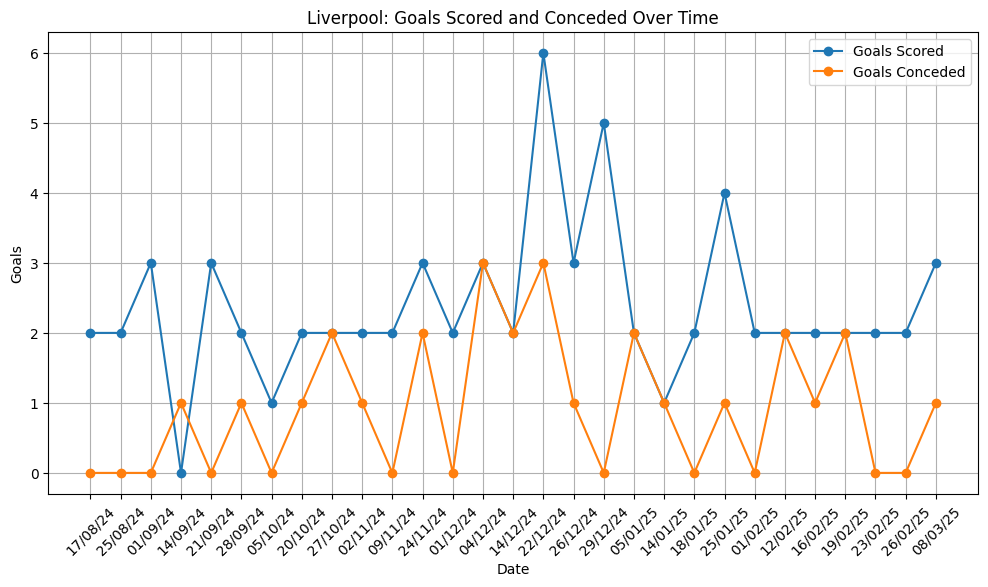

In [66]:
liverpool_matches = df[(df["HomeTeam"] == "Liverpool") | (df["AwayTeam"] == "Liverpool")]

liverpool_matches["Goals Scored"] = liverpool_matches.apply(
    lambda row: row["Full-Time Home Goals"] if row["HomeTeam"] == "Liverpool" else row["Full-Time Away Goals"], axis=1
)
liverpool_matches["Goals Conceded"] = liverpool_matches.apply(
    lambda row: row["Full-Time Away Goals"] if row["HomeTeam"] == "Liverpool" else row["Full-Time Home Goals"], axis=1
)

plt.figure(figsize=(12, 6))
plt.plot(liverpool_matches["Date"], liverpool_matches["Goals Scored"], label="Goals Scored", marker="o")
plt.plot(liverpool_matches["Date"], liverpool_matches["Goals Conceded"], label="Goals Conceded", marker="o")
plt.title("Liverpool: Goals Scored and Conceded Over Time")
plt.xlabel("Date")
plt.ylabel("Goals")
plt.xticks( rotation=45)
plt.legend()
plt.grid()
plt.show()

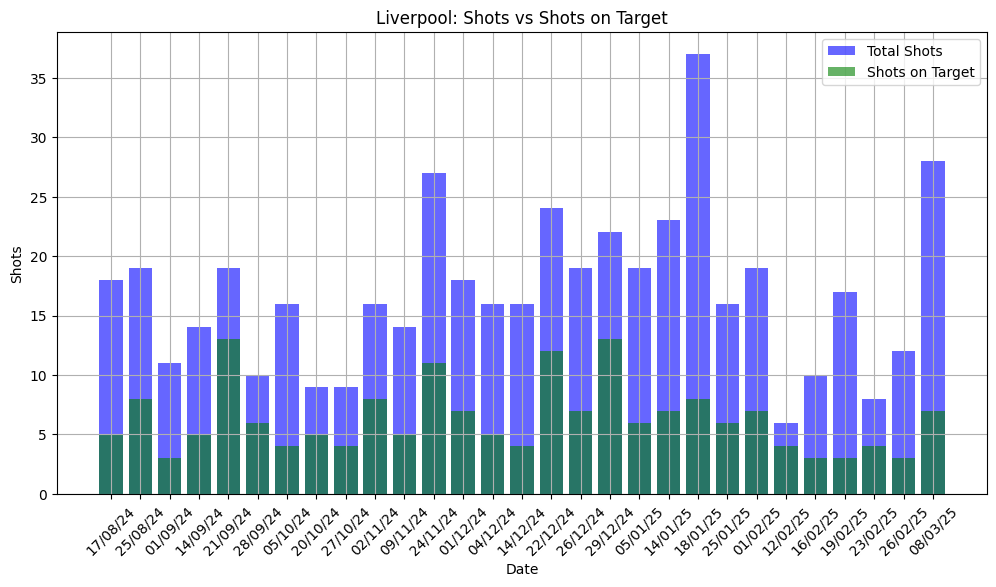

In [68]:

liverpool_matches["Total Shots"] = liverpool_matches.apply(
    lambda row: row["Home Shots"] if row["HomeTeam"] == "Liverpool" else row["Away Shots"], axis=1
)
liverpool_matches["Shots on Target"] = liverpool_matches.apply(
    lambda row: row["Home Shots on Target"] if row["HomeTeam"] == "Liverpool" else row["Away Shots on Target"], axis=1
)

plt.figure(figsize=(12, 6))
plt.bar(liverpool_matches["Date"], liverpool_matches["Total Shots"], label="Total Shots", color="blue", alpha=0.6)
plt.bar(liverpool_matches["Date"], liverpool_matches["Shots on Target"], label="Shots on Target", color="green", alpha=0.6)
plt.title("Liverpool: Shots vs Shots on Target")
plt.xlabel("Date")
plt.ylabel("Shots")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()